<a href="https://colab.research.google.com/github/bigirimanainnocent12/API_Projet_1/blob/main/API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***API REST***

# ***Modèle Conceptuel de Données (MCD)***

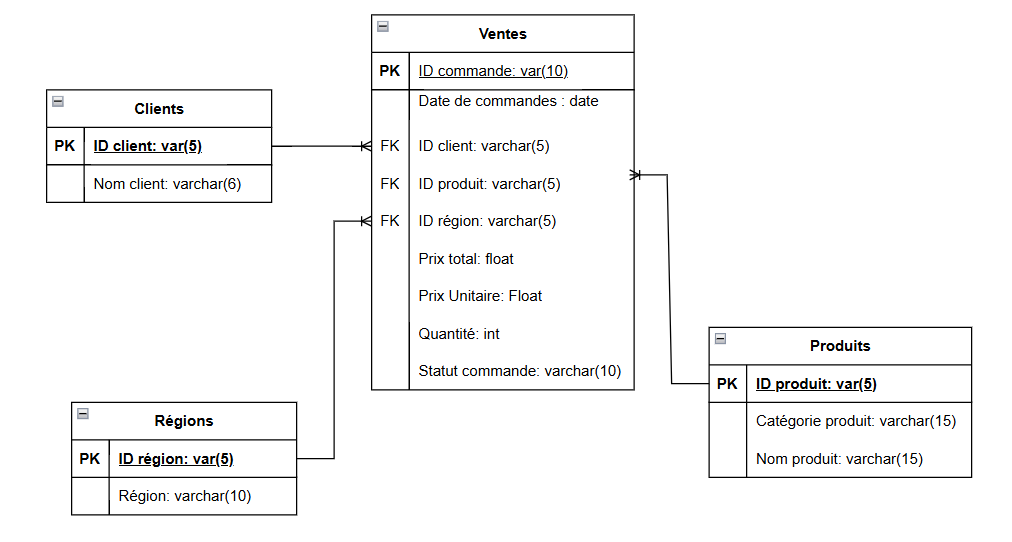

# ***Code SQL POUR LA CREATION DE LA BASE DE DONNEES AVEC SQL SERVER***

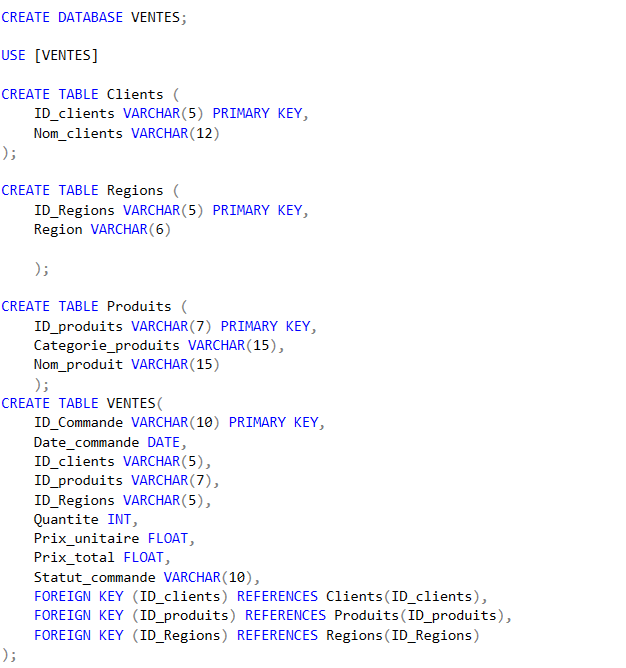